In [3]:
import sys
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)
#

# 2 sets of bandits code
### first one is copied and pasted
### second one is not


### both try to find the true probabilities. (p_bandits or p)

# Bandits code 1

In [4]:
# Define the multi-armed bandits
nb_bandits = 3  # Number of bandits
# True probability of winning for each bandit
p_bandits = [0.45, 0.55, 0.60]


def pull(i):
    """Pull arm of bandit with index `i` and return 1 if win, 
    else return 0."""
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0

In [5]:
# Define plotting functions
# Iterations to plot
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]


def plot(priors, step, ax):
    """Plot the priors for the current step."""
    plot_x = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')
#

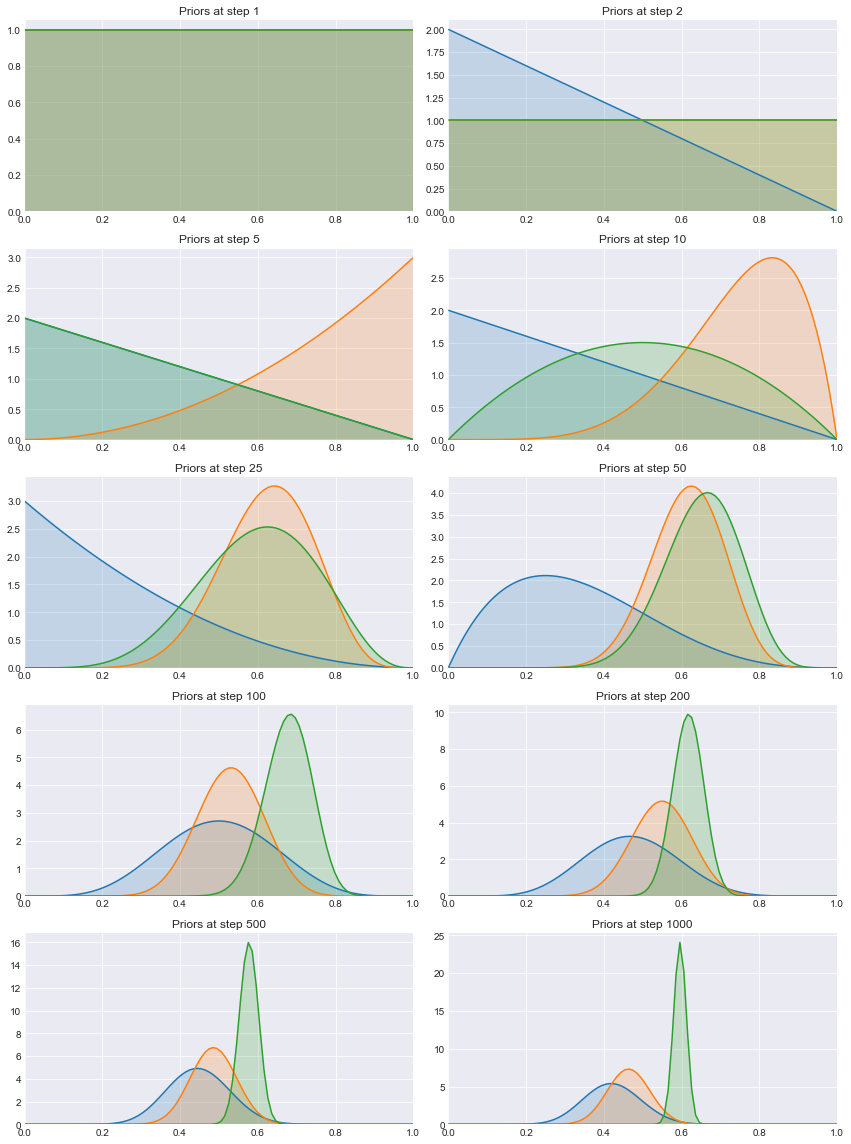

In [6]:

# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(12, 16))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0]  # Number of times we tried each bandit
wins = [0, 0, 0]  # Number of wins for each bandit

n = 1000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
    bandit_priors = [
        stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, wins)]
    # plot prior 
    if step in plots:
        plot(bandit_priors, step, next(axs))
    # Sample a probability theta for each bandit
    theta_samples = [
        d.rvs(1) for d in bandit_priors
    ]
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    # Pull the bandit
    x = pull(chosen_bandit)
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1
    wins[chosen_bandit] += x

plt.tight_layout()
plt.show()


# Code 2

In [7]:
def get_win(pull, p):
    win = 1 if pull == np.random.choice(len(p), p=p) else 0
    return win

def store_results(results, pull, is_win, all_wins, prior):
    is_win_int = int(is_win)
    results['bandit' + str(pull+1)+'_wins'].append(is_win_int)
    results['bandit' + str(pull+1)+'_pulls'].append(1)
    all_wins += is_win_int
    prior[pull] = sum(results['bandit' + str(pull+1)+'_wins']) / sum(results['bandit' + str(pull+1)+'_pulls'])
    return all_wins, results, prior

In [40]:
p = [0.2, 0.7, 0.1]
nbands = len(p)
prior = [0 for i in range(nbands)]
think = np.random.random(nbands)
epsilon = 0.9
one_eps = 1.0 - epsilon
p_e = [epsilon, one_eps]
results = {}
for i in range(nbands):
    results['bandit' + str(i+1)+'_wins'] = []
    results['bandit' + str(i+1)+'_pulls'] = []

niter = 10000
all_wins = 0
all_ps = []
for i in range(niter):
    if all_wins == 0:
        pull = np.random.choice(nbands)
    else:
        pull = np.random.choice([np.argmax(prior), np.random.choice(nbands)], p=p_e)
    is_win = get_win(pull, p)
    all_wins, results, prior = store_results(results, pull, is_win, all_wins, prior)
    if i % 50 == 0:
        print(i, prior)
    this_prior = prior.copy()    
    all_ps.append(this_prior)


0 [1.0, 0, 0]
50 [0.16666666666666666, 0.72, 0.0]
100 [0.16, 0.6805555555555556, 0.0]
150 [0.14814814814814814, 0.6722689075630253, 0.0]
200 [0.13793103448275862, 0.6706586826347305, 0.0]
250 [0.12903225806451613, 0.6790697674418604, 0.0]
300 [0.12121212121212122, 0.683206106870229, 0.16666666666666666]
350 [0.11764705882352941, 0.6796116504854369, 0.125]
400 [0.11764705882352941, 0.6815642458100558, 0.1111111111111111]
450 [0.16216216216216217, 0.6864197530864198, 0.1111111111111111]
500 [0.15789473684210525, 0.6806167400881057, 0.1111111111111111]
550 [0.15, 0.6833667334669339, 0.16666666666666666]
600 [0.14285714285714285, 0.6776556776556777, 0.15384615384615385]
650 [0.13953488372093023, 0.6818950930626058, 0.11764705882352941]
700 [0.17391304347826086, 0.6808176100628931, 0.10526315789473684]
750 [0.19148936170212766, 0.6832844574780058, 0.09090909090909091]
800 [0.18, 0.6813186813186813, 0.08695652173913043]
850 [0.16666666666666666, 0.6782945736434108, 0.08695652173913043]
900 [

6450 [0.18552036199095023, 0.700414937759336, 0.11219512195121951]
6500 [0.1891891891891892, 0.7009222661396575, 0.1111111111111111]
6550 [0.19642857142857142, 0.7008826413860739, 0.11004784688995216]
6600 [0.19383259911894274, 0.7017031630170316, 0.11004784688995216]
6650 [0.19298245614035087, 0.7007405022537025, 0.10900473933649289]
6700 [0.19130434782608696, 0.7005433045701502, 0.107981220657277]
6750 [0.19047619047619047, 0.7013481363996827, 0.11162790697674418]
6800 [0.19047619047619047, 0.7017626691847655, 0.1111111111111111]
6850 [0.19327731092436976, 0.7008600469116497, 0.11009174311926606]
6900 [0.1991701244813278, 0.7005588326606644, 0.11009174311926606]
6950 [0.1991701244813278, 0.7004160887656034, 0.11312217194570136]
7000 [0.19834710743801653, 0.7002141327623126, 0.11312217194570136]
7050 [0.19753086419753085, 0.70027330701488, 0.11261261261261261]
7100 [0.19591836734693877, 0.7002412545235223, 0.11607142857142858]
7150 [0.1975806451612903, 0.6994159053467126, 0.1194690265

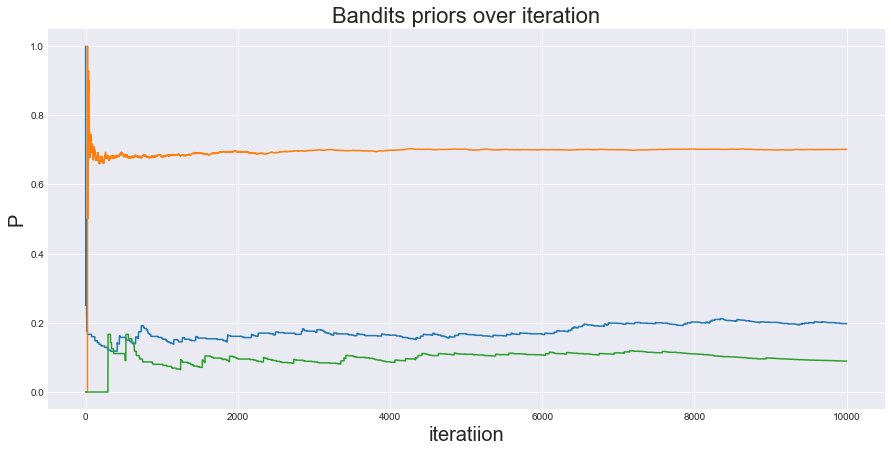

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))

plt.plot(list(range(len(all_ps))), list(map(lambda x: x[0], all_ps)))
plt.plot(list(range(len(all_ps))), list(map(lambda x: x[1], all_ps)))
plt.plot(list(range(len(all_ps))), list(map(lambda x: x[2], all_ps)))

plt.rc('axes', titlesize=22)     # fontsize of the axes title#

plt.title('Bandits priors over iteration')
# plt.xlabel('minutes played')
ax.set_ylabel('P', fontsize=20)
ax.set_xlabel('iteratiion', fontsize=20)
plt.show()